In [186]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#train
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, GridSearchCV

#Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#Standart
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, OneHotEncoder

# from sklearn.preprocessing import PolynomialFeatures


#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, roc_curve, \
    average_precision_score, precision_recall_curve,plot_precision_recall_curve, mean_squared_error, mean_absolute_error

#Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

import pickle

# from sklearn.model_selection import learning_curve

# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# from sklearn.inspection import permutation_importance
#import warnings
#warnings.simplefilter(action="ignore")

# First Baseline

## Regression lineaire avec outliers

In [187]:
dataset1 = pd.read_csv("DATA/df_encod.csv", sep=',')
data = dataset1.drop('Unnamed: 0', axis =1)

### Train_test_split

In [188]:
# linear regression with all features 
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)
 

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print('Score:',score)

# Predict a Response and print it:
y_predicted = model.predict(X_test) 
print('Predicted response:', y_predicted, sep='\n')

# R2 
print("R2={}".format(model.score(X_test,y_test)))

# MAE
errors = abs(y_predicted - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Coef: [-2.70808157e+04 -2.66420957e+04  1.11029785e+03 -4.42780156e+00
  8.86766878e+01 -4.95000595e+01  8.43978166e+01  3.81031882e+04
 -2.80872049e+04 -6.44054676e+04  1.38077617e+05 -2.07902624e+04
 -2.47946816e+04]
Intercept: -2229184.4513258976
Score: 0.6474795843811731
Predicted response:
[211956.75655394 240485.3599056  333430.5653913  ... 307030.12436763
 117133.97336105 162902.48289333]
R2=0.6412879897308121
Mean Absolute Error: 49892.21
Mean Absolute Percentage Error : 29.34 %.


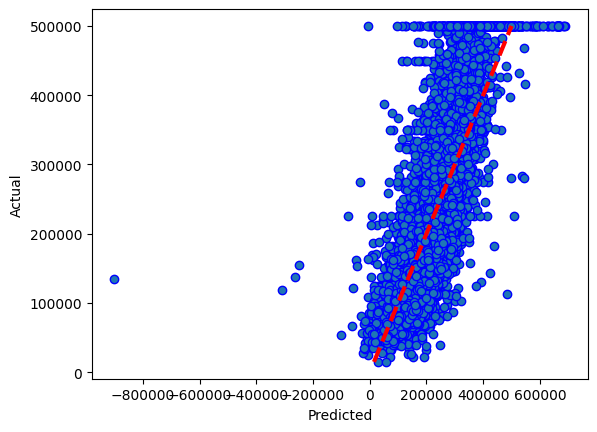

In [189]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show() 

### Crossvalidate

In [190]:
log_model = LinearRegression()

# 5-Fold Cross validate model
scores  = cross_validate(log_model,  X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("Average R2: ", average_r2, "// Average RMSE: ", average_rmse, "// Average MAE:", average_mae)

Average R2:  0.6451464349194724 // Average RMSE:  68620.38411042705 // Average MAE: 49764.74394845379


# Iteration 2


## Regression lineaire  sans features  households , total_bedrooms

### Train_test_split

In [191]:
mycolumns =['longitude','latitude','housing_median_age','total_rooms', 
                         'population','median_income','median_house_value','location_<1H OCEAN','location_INLAND','location_ISLAND','location_NEAR BAY','location_NEAR OCEAN']

In [192]:
data1 = data[mycolumns]

In [193]:
# linear regression with all features 
X = data1.drop(['median_house_value'], axis=1)
y = data1['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)
 

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print('Score:',score)

# Predict a Response and print it:
y_predicted2 = model.predict(X_test) 
print('Predicted response:', y_predicted, sep='\n')

Coef: [-2.81503932e+04 -2.73007135e+04  8.69585130e+02  1.74123991e+01
 -2.89543880e+01  3.20944305e+04  1.32696125e+04 -3.65855104e+04
  2.27373675e-13  8.05335555e+03  1.52625423e+04]
Intercept: -2339507.3879832397
Score: 0.6330300504443643
Predicted response:
[211956.75655394 240485.3599056  333430.5653913  ... 307030.12436763
 117133.97336105 162902.48289333]


# Iteration 3

## Regression lineaire sans outliers

In [194]:
dataset2 = pd.read_csv("DATA/df_encod_sans_outliers.csv", sep=',')
data2 = dataset2.drop('Unnamed: 0', axis =1)

In [195]:
# define X, y
y = dataset2['median_house_value']
X = data2.drop('median_house_value', axis =1)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
# Create an instance of a linear regression model and fit it to the data with the fit() function:
model2 = LinearRegression().fit(X, y) 

# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq2 = model2.score(X, y)
print('coefficient of determination:', r_sq2)

# Print the Intercept:
print('intercept:', model2.intercept_)

# Print the Slope:
print('slope:', model2.coef_) 

# Predict a Response and print it:
y_pred2 = model2.predict(X_test)
print('Predicted response:', y_pred2, sep='\n')

coefficient of determination: 0.618593316227131
intercept: -1920466.9825578732
slope: [-2.28541279e+04 -2.10075867e+04  6.91829243e+02 -4.52124019e+00
  5.33700973e+01 -2.76142716e+01  6.25926669e+01  3.47952557e+04
 -1.68186921e+04 -5.73281905e+04  1.13147930e+05 -2.36915525e+04
 -1.53094948e+04]
Predicted response:
[153251.66405775 198271.98928748 183107.51997338 ... 307035.81266988
 206168.40206075 104051.06708977]


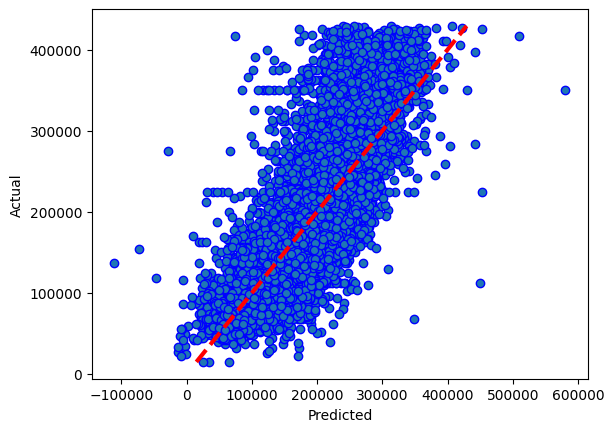

In [197]:
fig, ax = plt.subplots()
ax.scatter(y_pred2 , y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show() 

# Iteration 4

## Random forest avec Outliers

In [198]:
X = data1.drop('median_house_value', axis =1)
y = dataset1['median_house_value']

In [199]:
# standardizing the features (scaling)
X = RobustScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

rf = RandomForestRegressor(n_estimators=10, random_state=20)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

# R2 
print("R2={}".format(rf.score(X_test,y_test)))

# MAE
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

R2=0.7657985386108689
Mean Absolute Error: 37747.94
Mean Absolute Percentage Error : 21.17 %.


# Iteration 5

## StandardScaler & KNN

In [200]:
model_pipeline1 = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [201]:
model_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [202]:
prediction = model_pipeline1.predict(X_test)

In [203]:

# R2 
print("R2={}".format( model_pipeline1.score(X_test,y_test)))

# MAE
errors = abs(prediction - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

R2=0.6787878386778781
Mean Absolute Error: 44930.01
Mean Absolute Percentage Error : 24.26 %.


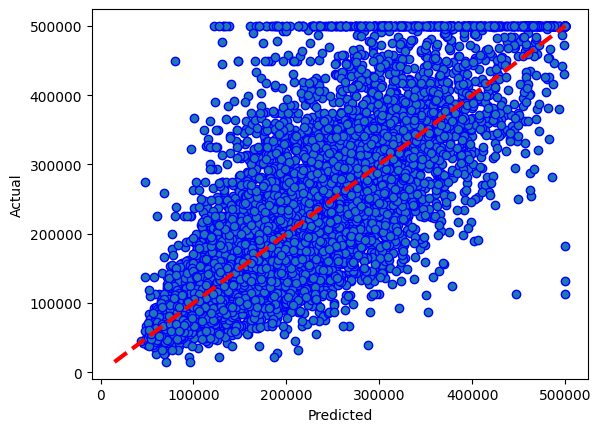

In [204]:
fig, ax = plt.subplots()
ax.scatter(prediction , y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show() 

In [206]:
Knn = KNeighborsRegressor(n_neighbors = 2)

In [207]:
# save the model to disk
filename = 'linear_regression.sav'
pickle.dump(Knn, open(filename, 'wb'))